In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
X_train=pd.read_pickle('X_train.pkl')
y_train=pd.read_pickle('y_train.pkl')

X_valid=pd.read_pickle('X_valid.pkl')
y_valid=pd.read_pickle('y_valid.pkl')

### Масшабируем с помощью RobustScaler

In [4]:
from sklearn.preprocessing import RobustScaler

In [5]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
cols_for_scale=['Age','SibSp','Parch','Fare']

In [7]:
scaler =  RobustScaler()

In [8]:
X_train[cols_for_scale]=scaler.fit_transform(X_train[cols_for_scale])

In [9]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,-0.017145,0.553892,0.372754,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.795588,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,6.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
X_valid[cols_for_scale]= scaler.transform(X_valid[cols_for_scale])

In [11]:
X_valid.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.381166,0.051358,0.430493,0.408072,0.791961,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,0.998803,0.801667,0.837912,1.930379,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,-2.220701,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.515317,0.000000,0.000000,-0.288115,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.037466,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.484683,1.000000,1.000000,0.750000,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.176991,4.000000,5.000000,10.984496,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Классификация с помощью  KNN

In [15]:
# Колличество соседий, по умолчанию равно 5
k_vals = np.arange(2,10)

In [14]:
accuracy_valid = []
accuracy_train=[]
for k_val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=k_val)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    y_pred_train=clf.predict(X_train)
    acc_valid = accuracy_score(y_valid,y_pred)
    acc_train=accuracy_score(y_train,y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'n_neighbors={k_val}\n\t acc_valid={acc_valid}\n\t acc_train={acc_train}\n ')

n_neighbors=2
	 acc_valid=0.8026905829596412
	 acc_train=0.8832335329341318
 
n_neighbors=3
	 acc_valid=0.8161434977578476
	 acc_train=0.8787425149700598
 
n_neighbors=4
	 acc_valid=0.7892376681614349
	 acc_train=0.842814371257485
 
n_neighbors=5
	 acc_valid=0.8071748878923767
	 acc_train=0.8622754491017964
 
n_neighbors=6
	 acc_valid=0.8251121076233184
	 acc_train=0.8353293413173652
 
n_neighbors=7
	 acc_valid=0.7847533632286996
	 acc_train=0.8323353293413174
 
n_neighbors=8
	 acc_valid=0.7757847533632287
	 acc_train=0.8173652694610778
 
n_neighbors=9
	 acc_valid=0.7802690582959642
	 acc_train=0.8173652694610778
 


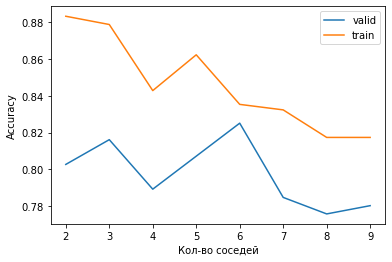

In [20]:
plt.plot(k_vals,accuracy_valid)
plt.plot(k_vals,accuracy_train)
plt.xlabel('Кол-во соседей')
plt.ylabel('Accuracy')
plt.legend(['valid','train'])

In [21]:
clf= KNeighborsClassifier(n_neighbors=6)

In [23]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [24]:
y_pred=clf.predict(X_valid)

In [25]:
accuracy_score(y_valid,y_pred)

0.8251121076233184

### Точность и полнота

In [26]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_valid,y_pred)

array([[123,  11],
       [ 28,  61]])

#### True Negative

In [30]:
TN=((y_valid==0)&(y_pred==0)).sum()
TN

123

#### False Positive

In [31]:
FP =((y_valid==0)&(y_pred==1)).sum()
FP

11

#### False Negative

In [33]:
FN = ((y_valid==1)&(y_pred==0)).sum()
FN

28

#### True Positive

In [34]:
TP=((y_valid==1)&(y_pred==1)).sum()
TP

61

In [38]:
# Normalized confusion matrix
cm = confusion_matrix(y_valid,y_pred)/y_valid.shape[0]
cm

array([[0.55156951, 0.04932735],
       [0.12556054, 0.2735426 ]])

#### Precision

In [40]:
Precision = TP/(TP+FP)
Precision

0.8472222222222222

In [41]:
from sklearn.metrics import precision_score

In [42]:
precision_score(y_valid,y_pred)

0.8472222222222222

#### Recall

In [43]:
Recall = TP/(TP+FN)
Recall

0.6853932584269663

In [44]:
from sklearn.metrics import recall_score

In [45]:
recall_score(y_valid,y_pred)

0.6853932584269663

#### F1 score

In [46]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.7577639751552795

In [47]:
from sklearn.metrics import f1_score

In [48]:
f1_score(y_valid,y_pred)

0.7577639751552795

#### AUC

In [49]:
y_pred_proba= clf.predict_proba(X_valid)
y_pred_proba

array([[0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.16666667, 0.83333333],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.

In [50]:
y_pred_proba= y_pred_proba[:,1]
y_pred_proba

array([0.33333333, 0.16666667, 0.        , 1.        , 0.5       ,
       1.        , 0.83333333, 0.16666667, 0.5       , 0.83333333,
       0.33333333, 0.16666667, 0.16666667, 0.        , 0.33333333,
       1.        , 0.33333333, 0.83333333, 0.        , 0.16666667,
       0.16666667, 0.5       , 0.33333333, 0.        , 0.        ,
       0.16666667, 0.33333333, 0.16666667, 0.33333333, 0.5       ,
       0.16666667, 0.66666667, 0.33333333, 0.5       , 0.16666667,
       0.33333333, 0.5       , 0.83333333, 0.5       , 0.        ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.33333333, 0.5       , 0.        , 0.66666667, 0.        ,
       0.83333333, 0.33333333, 0.83333333, 1.        , 0.66666667,
       0.16666667, 1.        , 0.66666667, 0.5       , 0.16666667,
       0.66666667, 0.33333333, 0.        , 0.33333333, 1.        ,
       0.83333333, 0.83333333, 0.33333333, 1.        , 0.     

Text(0, 0.5, 'Кол-во')

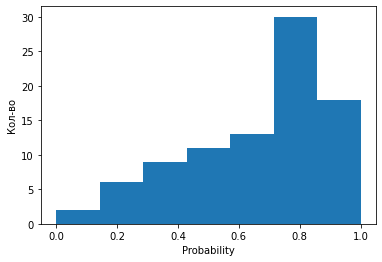

In [58]:
plt.hist(y_pred_proba[y_valid==1],bins=7)
plt.xlabel('Probability')
plt.ylabel('Кол-во')

Text(0, 0.5, 'Кол-во')

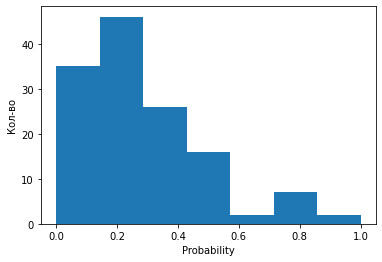

In [59]:
plt.hist(y_pred_proba[y_valid==0],bins=7)
plt.xlabel('Probability')
plt.ylabel('Кол-во')

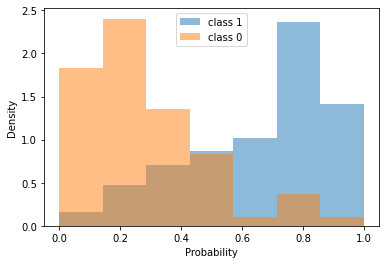

In [60]:
plt.hist(y_pred_proba[y_valid == 1], bins=7, density=True, label='class 1', alpha=0.5)
plt.hist(y_pred_proba[y_valid == 0], bins=7, density=True, label='class 0', alpha=0.5)

plt.xlabel("Probability")
plt.ylabel("Density")

plt.legend()

In [61]:
from sklearn.metrics import roc_curve

In [62]:
fpr, tpr, thresholds = roc_curve(y_valid,y_pred_proba,pos_label=1)

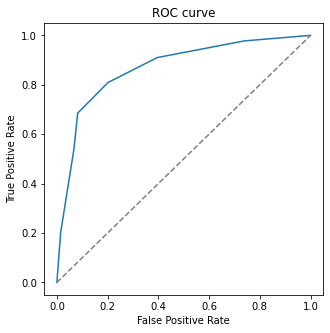

In [63]:
plt.rcParams['figure.figsize'] = 5, 5

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid, y_pred_proba)

0.8682710045279222